In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
mnist=datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist



11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(train_images[0],train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

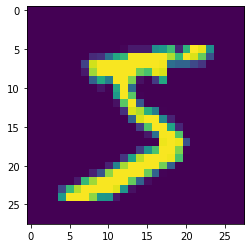

In [0]:
plt.imshow(train_images[0])
plt.show()

In [0]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

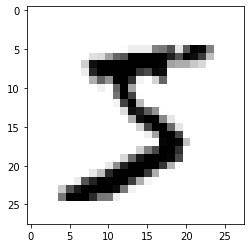

In [0]:
plt.imshow(train_images[0],cmap=plt.cm.binary)

In [0]:
tf.size(train_images[0])

<tf.Tensor: shape=(), dtype=int32, numpy=784>

In [0]:
model = models.Sequential()


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

In [0]:
model.add(layers.Dense(10))

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2626 - accuracy: 0.9251 - val_loss: 0.1387 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1167 - accuracy: 0.9655 - val_loss: 0.0987 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9761 - val_loss: 0.0899 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0853 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0768 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0798 - val_accuracy:

313/313 - 0s - loss: 0.0802 - accuracy: 0.9779


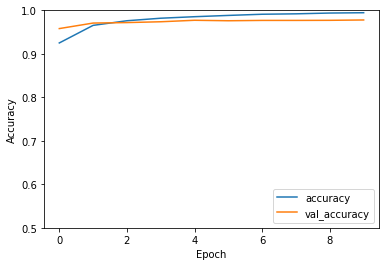

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
print(test_acc)

0.9779000282287598


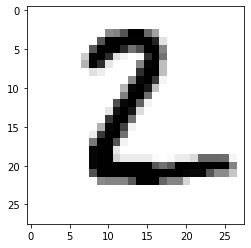

In [0]:
plt.imshow(test_images[1],cmap=plt.cm.binary)


In [0]:
predict=model.predict(test_images)

In [0]:
predict

array([[-10.924994  , -13.976132  ,  -0.4065883 , ...,  12.813591  ,
         -4.259984  ,  -0.14165126],
       [ -6.944825  ,   2.4157739 ,  18.382483  , ..., -21.274227  ,
         -1.4845562 , -15.277321  ],
       [ -9.269791  ,   9.433102  ,  -1.3859407 , ...,  -1.441316  ,
         -2.682351  , -11.240595  ],
       ...,
       [-21.96299   , -22.246695  , -18.992332  , ...,  -0.6643974 ,
          1.6888281 ,   4.773492  ],
       [-10.671589  , -17.664618  , -22.300543  , ...,  -8.725319  ,
          3.4514747 , -10.461904  ],
       [ -1.4345933 , -20.257214  , -10.979489  , ..., -25.103592  ,
         -9.834233  , -12.122707  ]], dtype=float32)

In [0]:
import numpy as np

print(np.argmax(predict[1]))

2


In [0]:
predict[1]

array([ -6.944825 ,   2.4157739,  18.382483 ,  -3.3392012, -36.245327 ,
        -2.8960147,  -0.8937084, -21.274227 ,  -1.4845562, -15.277321 ],
      dtype=float32)